# Peer graded Assignement - Capstone Project - The Battle of Neighborhoods 

Lydia Bessaï - January, 19th 2021

## Where are the healthy districts in NY? 

## I - Import data and explore the neighborhoods

### a - Import the libraries & download data

First import the needed libraries. 

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


Download the data from NY to get the neighborhoods. 

In [2]:
!wget -q -O 'newyork_data.json' https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json
print('Data downloaded!')

Data downloaded!


### b - Explore the data and define the relevant json data

Let explore the data.

In [3]:
with open ('newyork_data.json') as json_data:
    newyork_data= json.load(json_data)

In [4]:
#Explore the data 
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

As the neighborhoods data are in "features" in the json file, let's precise our data or interest.

In [5]:
neigh_data= newyork_data['features']
neigh_data

[{'type': 'Feature',
  'id': 'nyu_2451_34572.1',
  'geometry': {'type': 'Point',
   'coordinates': [-73.84720052054902, 40.89470517661]},
  'geometry_name': 'geom',
  'properties': {'name': 'Wakefield',
   'stacked': 1,
   'annoline1': 'Wakefield',
   'annoline2': None,
   'annoline3': None,
   'annoangle': 0.0,
   'borough': 'Bronx',
   'bbox': [-73.84720052054902,
    40.89470517661,
    -73.84720052054902,
    40.89470517661]}},
 {'type': 'Feature',
  'id': 'nyu_2451_34572.2',
  'geometry': {'type': 'Point',
   'coordinates': [-73.82993910812398, 40.87429419303012]},
  'geometry_name': 'geom',
  'properties': {'name': 'Co-op City',
   'stacked': 2,
   'annoline1': 'Co-op',
   'annoline2': 'City',
   'annoline3': None,
   'annoangle': 0.0,
   'borough': 'Bronx',
   'bbox': [-73.82993910812398,
    40.87429419303012,
    -73.82993910812398,
    40.87429419303012]}},
 {'type': 'Feature',
  'id': 'nyu_2451_34572.3',
  'geometry': {'type': 'Point',
   'coordinates': [-73.82780644716412, 

### c - Create a dataframe with the neighborhoods in New York City

First, let's create an empty dataframe 

In [6]:
# Define the columns
columns_names=['Borough', 'Neighborhood', 'Latitude', 'Longitude']

# Instantiate the dataframe
neigh_df=pd.DataFrame(columns=columns_names)

Then, we can fill out the neigh_df thanks to our json file.

In [7]:
for data in neigh_data:
    borough = neigh_name = data['properties']['borough']
    neigh_name = data['properties']['name']
    
    neigh_latlon = data ['geometry']['coordinates']
    neigh_lat = neigh_latlon[1]
    neigh_lon = neigh_latlon[0]
    
    neigh_df = neigh_df.append({'Borough': borough,
                               'Neighborhood': neigh_name,
                               'Latitude': neigh_lat,
                               'Longitude': neigh_lon}, ignore_index=True)

In [8]:
# Let's see our neigh_df
neigh_df.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [9]:
neigh_df.Borough.unique()

array(['Bronx', 'Manhattan', 'Brooklyn', 'Queens', 'Staten Island'],
      dtype=object)

We have a good dataframe with all the neighborhoods and borough in NY with the latitude and the longitude. 
Let's create a map with these neighborhoods.

### d - Create a map with the neighborhoods of New York City

In [10]:
# First define our address
address = 'New York City, NY'

# Find the latitude and the longitude of NY
geolocator = Nominatim (user_agent='ny_explorer')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('The geographical coordinate of NY are {}, {}.'.format(latitude, longitude))

The geographical coordinate of NY are 40.7127281, -74.0060152.


In [11]:
# Create the map of NY
map_ny=folium.Map(location=[latitude, longitude], zoom_start=10)

#Add our neighborhood
for lat, lon, borough, neighborhood in zip (neigh_df['Latitude'], neigh_df['Longitude'], neigh_df['Borough'], neigh_df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_ny)  
    
map_ny

## II - Import Foursquare data and create a sport and restaurant index

### a - Import Foursquare data 

Let's connect with the API with our credentials.

In [12]:
CLIENT_ID = 'IK0OCJP2ALP4KSMAD3CT3XO1O5FQRF1ME25022XTD3IT4SSP' # my Foursquare ID
CLIENT_SECRET = 'BMVBZVO0MNJLW2HHSCWAKLXOZYSLXAZUAHPUBWP5GCZCUKFG' # my Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('My credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

My credentials:
CLIENT_ID: IK0OCJP2ALP4KSMAD3CT3XO1O5FQRF1ME25022XTD3IT4SSP
CLIENT_SECRET:BMVBZVO0MNJLW2HHSCWAKLXOZYSLXAZUAHPUBWP5GCZCUKFG


We would like to get the venues of Restaurants and Sport institution. First, let's create two lists with the names of the categories we would like to target.For that, we can create an api request with a specific query related to the categroy we are looking for. 
For more details:
https://developer.foursquare.com/docs/build-with-foursquare/categories/
https://www.xspdf.com/resolution/11049375.html

In [13]:
category_sports='4f4528bc4b90abdf24c9de85'
category_restaurants='4d4b7105d754a06374d81259'

Then, create a function to get the request API specific to sports and restaurants.

In [14]:
def getNearbyVenuesSports(borough, names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for borough, name, lat, lng in zip(borough, names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,
        category_sports)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(borough, 
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
                

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough','Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [15]:
def getNearbyVenuesRestaurants(borough, names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for borough, name, lat, lng in zip(borough, names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,
        category_restaurants)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(borough, 
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
                

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough','Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [16]:
# Let's create the two dataframes related to sports and restaurants in NY
#Related to sport
NY_sports=getNearbyVenuesSports(borough=neigh_df['Borough'],names=neigh_df['Neighborhood'],latitudes=neigh_df['Latitude'],
                                   longitudes=neigh_df['Longitude'])



Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Marble Hill
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker

In [24]:
#Related to restaurants
NY_restaurants=getNearbyVenuesRestaurants(borough=neigh_df['Borough'],names=neigh_df['Neighborhood'],latitudes=neigh_df['Latitude'],
                                   longitudes=neigh_df['Longitude'])

Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Marble Hill
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker

In [18]:
#Let's see the head of each of them
NY_sports.head()

,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bronx,Wakefield,40.894705,-73.847201,JoeKaratePro,40.897048,-73.844556,Gym / Fitness Center
1,Bronx,Co-op City,40.874294,-73.829939,My Gym,40.872681,-73.829400,Gym / Fitness Center
2,Bronx,Co-op City,40.874294,-73.829939,Section 4 Basketball Courts (Co Op City),40.872412,-73.826302,Basketball Court
3,Bronx,Co-op City,40.874294,-73.829939,truman track n field,40.874963,-73.830847,Baseball Field
4,Bronx,Co-op City,40.874294,-73.829939,Co Op City Lil League Field,40.875853,-73.824418,Baseball Field


In [23]:
NY_sports_csv=NY_sports.to_csv()

In [25]:
NY_restaurants.head()

,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bronx,Wakefield,40.894705,-73.847201,Dunkin',40.890459,-73.849089,Donut Shop
1,Bronx,Wakefield,40.894705,-73.847201,Subway,40.890468,-73.849152,Sandwich Place
2,Bronx,Wakefield,40.894705,-73.847201,Pitman Deli,40.896744,-73.844398,Food
3,Bronx,Wakefield,40.894705,-73.847201,Central Deli,40.896728,-73.844387,Deli / Bodega
4,Bronx,Wakefield,40.894705,-73.847201,Aprils Catering,40.890942,-73.850143,Food


In [26]:
NY_restaurants_csv=NY_restaurants.to_csv()

### b - Calculation of sport and restaurant index

To make this calculation, we have to convert the data into binary data thanks to the get_dummies function.

In [27]:
# one hot encoding
nysports_onehot = pd.get_dummies(NY_sports[['Venue Category']], prefix="", prefix_sep="")
nyrestaurants_onehot= pd.get_dummies(NY_restaurants[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
nysports_onehot['Neighborhood'] = NY_sports['Neighborhood'] 
nyrestaurants_onehot['Neighborhood'] = NY_restaurants['Neighborhood']

# move neighborhood column to the first column
fixed_columns_sports = [nysports_onehot.columns[-1]] + list(nysports_onehot.columns[:-1])
nysports_onehot=nysports_onehot[fixed_columns_sports]

fixed_columns_restaurants = [nyrestaurants_onehot.columns[-1]] + list(nyrestaurants_onehot.columns[:-1])
nyrestaurants_onehot=nyrestaurants_onehot[fixed_columns_restaurants]


In [28]:
# head of nysports
nysports_onehot.head()

,Neighborhood,Acupuncturist,Adult Education Center,Alternative Healer,Athletics & Sports,Badminton Court,Baseball Field,Basketball Court,Bike Shop,Boxing Gym,Building,Chiropractor,Climbing Gym,Clothing Store,Club House,College Basketball Court,College Gym,College Rec Center,Community Center,Cycle Studio,Dance Studio,Deli / Bodega,Doctor's Office,Dog Run,Event Service,Event Space,Field,Football Stadium,General Entertainment,Go Kart Track,Golf Course,Golf Driving Range,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,High School,Hockey Field,Hockey Rink,Hospital,Hotel,Indie Movie Theater,Martial Arts School,Massage Studio,Medical Center,Non-Profit,Nutritionist,Office,Outdoor Gym,Paintball Field,Park,Physical Therapist,Pilates Studio,Playground,Pool,Residential Building (Apartment / Condo),Rock Climbing Spot,Skate Park,Skating Rink,Soccer Field,Social Club,Spa,Spiritual Center,Sporting Goods Shop,Sports Club,Squash Court,Tennis Court,Tennis Stadium,Track,Trade School,Volleyball Court,Weight Loss Center,Women's Store,Yoga Studio
0,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Co-op City,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Co-op City,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Co-op City,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Co-op City,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
# head of nyrestaurants
nyrestaurants_onehot.head()

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,BBQ Joint,Bagel Shop,Bakery,Belgian Restaurant,Bistro,Brazilian Restaurant,Breakfast Spot,Buffet,Burger Joint,Burmese Restaurant,Burrito Place,Cafeteria,Café,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cha Chaan Teng,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Creperie,Cuban Restaurant,Czech Restaurant,Deli / Bodega,Dim Sum Restaurant,Diner,Donut Shop,Dosa Place,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Food,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Halal Restaurant,Hawaiian Restaurant,Himalayan Restaurant,Hot Dog Joint,Hotpot Restaurant,Hunan Restaurant,Indian Restaurant,Indonesian Restaurant,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jewish Restaurant,Kebab Restaurant,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Lebanese Restaurant,Mac & Cheese Joint,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,New American Restaurant,Noodle House,North Indian Restaurant,Paella Restaurant,Pakistani Restaurant,Peking Duck Restaurant,Persian Restaurant,Peruvian Restaurant,Pet Café,Pizza Place,Poke Place,Polish Restaurant,Portuguese Restaurant,Poutine Place,Puerto Rican Restaurant,Ramen Restaurant,Restaurant,Romanian Restaurant,Russian Restaurant,Salad Place,Salvadoran Restaurant,Sandwich Place,Scandinavian Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Snack Place,Soba Restaurant,Soup Place,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spanish Restaurant,Sri Lankan Restaurant,Steakhouse,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Theme Restaurant,Tibetan Restaurant,Tonkatsu Restaurant,Turkish Restaurant,Udon Restaurant,Ukrainian Restaurant,Varenyky restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint
0,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Now we got the two dataframes, let's groupby neighborhood.

In [30]:
ny_sports_nei=nysports_onehot.groupby(by=nysports_onehot['Neighborhood']).sum()
ny_sports_nei.head()

,Acupuncturist,Adult Education Center,Alternative Healer,Athletics & Sports,Badminton Court,Baseball Field,Basketball Court,Bike Shop,Boxing Gym,Building,Chiropractor,Climbing Gym,Clothing Store,Club House,College Basketball Court,College Gym,College Rec Center,Community Center,Cycle Studio,Dance Studio,Deli / Bodega,Doctor's Office,Dog Run,Event Service,Event Space,Field,Football Stadium,General Entertainment,Go Kart Track,Golf Course,Golf Driving Range,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,High School,Hockey Field,Hockey Rink,Hospital,Hotel,Indie Movie Theater,Martial Arts School,Massage Studio,Medical Center,Non-Profit,Nutritionist,Office,Outdoor Gym,Paintball Field,Park,Physical Therapist,Pilates Studio,Playground,Pool,Residential Building (Apartment / Condo),Rock Climbing Spot,Skate Park,Skating Rink,Soccer Field,Social Club,Spa,Spiritual Center,Sporting Goods Shop,Sports Club,Squash Court,Tennis Court,Tennis Stadium,Track,Trade School,Volleyball Court,Weight Loss Center,Women's Store,Yoga Studio
Neighborhood,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Allerton,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Annadale,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Arrochar,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Astoria,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,3,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
Auburndale,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
ny_restaurants_nei=nyrestaurants_onehot.groupby(by=nyrestaurants_onehot['Neighborhood']).sum()

In [32]:
ny_restaurants_nei.head(20)

,Afghan Restaurant,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,BBQ Joint,Bagel Shop,Bakery,Belgian Restaurant,Bistro,Brazilian Restaurant,Breakfast Spot,Buffet,Burger Joint,Burmese Restaurant,Burrito Place,Cafeteria,Café,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cha Chaan Teng,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Creperie,Cuban Restaurant,Czech Restaurant,Deli / Bodega,Dim Sum Restaurant,Diner,Donut Shop,Dosa Place,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Food,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Halal Restaurant,Hawaiian Restaurant,Himalayan Restaurant,Hot Dog Joint,Hotpot Restaurant,Hunan Restaurant,Indian Restaurant,Indonesian Restaurant,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jewish Restaurant,Kebab Restaurant,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Lebanese Restaurant,Mac & Cheese Joint,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,New American Restaurant,Noodle House,North Indian Restaurant,Paella Restaurant,Pakistani Restaurant,Peking Duck Restaurant,Persian Restaurant,Peruvian Restaurant,Pet Café,Pizza Place,Poke Place,Polish Restaurant,Portuguese Restaurant,Poutine Place,Puerto Rican Restaurant,Ramen Restaurant,Restaurant,Romanian Restaurant,Russian Restaurant,Salad Place,Salvadoran Restaurant,Sandwich Place,Scandinavian Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Snack Place,Soba Restaurant,Soup Place,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spanish Restaurant,Sri Lankan Restaurant,Steakhouse,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Theme Restaurant,Tibetan Restaurant,Tonkatsu Restaurant,Turkish Restaurant,Udon Restaurant,Ukrainian Restaurant,Varenyky restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint
Neighborhood,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Allerton,0,0,1,0,0,0,0,0,0,0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,4,0,0,1,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Annadale,0,0,3,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Arden Heights,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Arlington,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Arrochar,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0

Now, let's create a sport and a restaurants index to compare the quantity of sports institutions and restaurants per neighborhood.

In [33]:
# For that, we need to create a column Total which gathers all the number of sports or restaurants per neighborhood.
total_sports=ny_sports_nei.sum(axis=1)
total_restaurants=ny_restaurants_nei.sum(axis=1)

Now, let's normalize by the maximum to get a sorting range of neighborhood

In [34]:
max_sport=total_sports.max()
max_restaurant=total_restaurants.max()

# print the neighborhood related to the maximum value
print(total_sports.idxmax(axis=1))
print(total_restaurants.idxmax(axis=1))

Civic Center
Murray Hill


These two neighborhoods are located in Manhattan. It seems logical because of the density population and the activity of the borough that there are the neighborhood that have the most restaurants or sport intallations.

In [35]:
# Calcul of the index of sports or restaurants: normalization with the maximum value.
# Because we want to create a contrast between Restaurants and Sport institution, we will invert the order of the Restaurants'index.
total_sports = total_sports/max_sport
total_restaurants = 1-(total_restaurants/max_restaurant)

In [36]:
# Convert to dataframe
df_sport = total_sports.to_frame()
df_restaurants = total_restaurants.to_frame()

In [37]:
df_sport.columns=['Sport index']
df_restaurants.columns=['Restaurant index']

In [38]:
# Convert to float
df_sport['Sport index'] = pd.to_numeric(df_sport['Sport index'], downcast='float')


In [39]:
df_sport.head()

,Sport index
Neighborhood,
Allerton,0.03
Annadale,0.01
Arrochar,0.02
Astoria,0.16
Auburndale,0.04


In [43]:
df_restaurants

,Restaurant index
Neighborhood,
Allerton,0.787611
Annadale,0.867257
Arden Heights,0.982301
Arlington,0.955752
Arrochar,0.867257
Arverne,0.929204
Astoria,0.221239
Astoria Heights,0.911504
Auburndale,0.893805


### c - Merge of all dataframes

In [47]:
neigh_int=neigh_df[['Borough','Neighborhood']]
neigh_int.head()

,Borough,Neighborhood
0,Bronx,Wakefield
1,Bronx,Co-op City
2,Bronx,Eastchester
3,Bronx,Fieldston
4,Bronx,Riverdale


In [49]:
#Merge dataframes
df_bor_nei=pd.merge(neigh_int, df_sport, how='left', on='Neighborhood')
df_sp_re=pd.merge(df_bor_nei, df_restaurants, how= 'left', on='Neighborhood')

In [50]:
df_sp_re.head()

,Borough,Neighborhood,Sport index,Restaurant index
0,Bronx,Wakefield,0.01,0.955752
1,Bronx,Co-op City,0.04,0.902655
2,Bronx,Eastchester,NaN,0.876106
3,Bronx,Fieldston,0.01,NaN
4,Bronx,Riverdale,0.02,0.991150


In [51]:
df_sp_re.dtypes

Borough              object
Neighborhood         object
Sport index         float32
Restaurant index    float64
dtype: object

In [54]:
df_sp_re=df_sp_re.fillna(0)

In [56]:
df_sp_re=df_sp_re.round(2)

In [57]:
df_sp_re.head()

,Borough,Neighborhood,Sport index,Restaurant index
0,Bronx,Wakefield,0.01,0.96
1,Bronx,Co-op City,0.04,0.90
2,Bronx,Eastchester,0.00,0.88
3,Bronx,Fieldston,0.01,0.00
4,Bronx,Riverdale,0.02,0.99


## III - Clustering of neighborhoods based on sport and restaurant index

### a - KMeans Clustering 

Let's assume we want to define 4 clusters to highlight "healthy" vs "food" districts.

In [116]:
# set number of clusters
kclusters = 4

df_clustering = df_sp_re.drop(['Borough','Neighborhood'], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 0, 1, 2, 1, 1, 2, 1], dtype=int32)

In [117]:
# add clustering labels
df_sp_re=df_sp_re.drop('Cluster Labels', axis=1)
df_sp_re.insert(0, 'Cluster Labels', kmeans.labels_)

In [118]:
df_sp_re.head()

,Cluster Labels,Borough,Neighborhood,Sport index,Restaurant index
0,1,Bronx,Wakefield,0.01,0.96
1,1,Bronx,Co-op City,0.04,0.90
2,1,Bronx,Eastchester,0.00,0.88
3,0,Bronx,Fieldston,0.01,0.00
4,1,Bronx,Riverdale,0.02,0.99


In [134]:
df_sp_re['Cluster Labels'].value_counts()

1    212
2     53
3     25
0     16
Name: Cluster Labels, dtype: int64

In [69]:
# Merge table to get the latitude and the longitude of neighborhood
neigh_mer=neigh_df[['Neighborhood','Longitude','Latitude']]
neigh_mer.head()

,Neighborhood,Longitude,Latitude
0,Wakefield,-73.847201,40.894705
1,Co-op City,-73.829939,40.874294
2,Eastchester,-73.827806,40.887556
3,Fieldston,-73.905643,40.895437
4,Riverdale,-73.912585,40.890834


In [120]:
df_merged=pd.merge(df_sp_re, neigh_mer, how='left', on='Neighborhood')
df_merged.head()

,Cluster Labels,Borough,Neighborhood,Sport index,Restaurant index,Longitude,Latitude
0,1,Bronx,Wakefield,0.01,0.96,-73.847201,40.894705
1,1,Bronx,Co-op City,0.04,0.90,-73.829939,40.874294
2,1,Bronx,Eastchester,0.00,0.88,-73.827806,40.887556
3,0,Bronx,Fieldston,0.01,0.00,-73.905643,40.895437
4,1,Bronx,Riverdale,0.02,0.99,-73.912585,40.890834


In [136]:
df_merged['Cluster Labels'].value_counts()

1    214
2     55
3     29
0     16
Name: Cluster Labels, dtype: int64

In [121]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_merged['Latitude'], df_merged['Longitude'], df_merged['Neighborhood'], df_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### c - Examination of clusters 

In [122]:
df_merged.loc[df_merged['Cluster Labels'] == 0]

,Cluster Labels,Borough,Neighborhood,Sport index,Restaurant index,Longitude,Latitude
3,0,Bronx,Fieldston,0.01,0.00,-73.905643,40.895437
34,0,Bronx,Belmont,0.06,0.27,-73.888452,40.857277
76,0,Brooklyn,Mill Island,0.00,0.00,-73.908186,40.606336
84,0,Brooklyn,Clinton Hill,0.13,0.27,-73.967843,40.693229
97,0,Brooklyn,South Side,0.33,0.12,-73.958001,40.710861
100,0,Manhattan,Chinatown,0.34,0.12,-73.994279,40.715618
125,0,Manhattan,West Village,0.29,0.12,-74.006180,40.734434
131,0,Queens,Astoria,0.16,0.22,-73.915654,40.768509
175,0,Queens,Breezy Point,0.00,0.00,-73.925512,40.557401
183,0,Queens,Neponsit,0.00,0.00,-73.857547,40.572037


In [123]:
df_merged.loc[df_merged['Cluster Labels'] == 1]

,Cluster Labels,Borough,Neighborhood,Sport index,Restaurant index,Longitude,Latitude
0,1,Bronx,Wakefield,0.01,0.96,-73.847201,40.894705
1,1,Bronx,Co-op City,0.04,0.90,-73.829939,40.874294
2,1,Bronx,Eastchester,0.00,0.88,-73.827806,40.887556
4,1,Bronx,Riverdale,0.02,0.99,-73.912585,40.890834
6,1,Manhattan,Marble Hill,0.07,0.89,-73.910660,40.876551
7,1,Bronx,Woodlawn,0.01,0.87,-73.867315,40.898273
9,1,Bronx,Williamsbridge,0.00,0.95,-73.857446,40.881039
10,1,Bronx,Baychester,0.04,0.92,-73.835798,40.866858
11,1,Bronx,Pelham Parkway,0.03,0.86,-73.854756,40.857413
12,1,Bronx,City Island,0.02,0.89,-73.786488,40.847247


In [124]:
df_merged.loc[df_merged['Cluster Labels'] == 2]

,Cluster Labels,Borough,Neighborhood,Sport index,Restaurant index,Longitude,Latitude
5,2,Bronx,Kingsbridge,0.08,0.49,-73.902818,40.881687
8,2,Bronx,Norwood,0.07,0.68,-73.879391,40.877224
13,2,Bronx,Bedford Park,0.04,0.65,-73.885512,40.870185
16,2,Bronx,Fordham,0.10,0.41,-73.896427,40.860997
46,2,Brooklyn,Bay Ridge,0.10,0.35,-74.030621,40.625801
49,2,Brooklyn,Greenpoint,0.18,0.46,-73.954241,40.730201
59,2,Brooklyn,Prospect Heights,0.21,0.63,-73.964859,40.676822
62,2,Brooklyn,Bushwick,0.10,0.55,-73.925258,40.698116
64,2,Brooklyn,Brooklyn Heights,0.20,0.37,-73.993782,40.695864
65,2,Brooklyn,Cobble Hill,0.19,0.43,-73.998561,40.687920


In [125]:
df_merged.loc[df_merged['Cluster Labels'] == 3]

,Cluster Labels,Borough,Neighborhood,Sport index,Restaurant index,Longitude,Latitude
86,3,Brooklyn,Downtown,0.49,0.28,-73.983463,40.690844
96,3,Brooklyn,North Side,0.51,0.12,-73.958809,40.714823
107,3,Manhattan,Upper East Side,0.46,0.33,-73.960508,40.775639
108,3,Manhattan,Yorkville,0.44,0.19,-73.947118,40.775930
109,3,Manhattan,Lenox Hill,0.56,0.12,-73.958860,40.768113
112,3,Manhattan,Lincoln Square,0.67,0.52,-73.985338,40.773529
113,3,Manhattan,Clinton,0.59,0.12,-73.996119,40.759101
114,3,Manhattan,Midtown,1.00,0.12,-73.981669,40.754691
115,3,Manhattan,Murray Hill,0.87,0.00,-73.978332,40.748303
116,3,Manhattan,Murray Hill,0.87,0.00,-73.812763,40.764126


##### What is the mean and the median of Sport and Restaurant index for each cluster? What is the repartition through Borough? 

In [126]:
df_0= df_merged.loc[df_merged['Cluster Labels'] == 0]
df_0.describe()

,Cluster Labels,Sport index,Restaurant index,Longitude,Latitude
count,16.0,16.000000,16.000000,16.000000,16.000000
mean,0.0,0.088125,0.089375,-73.950978,40.678815
std,0.0,0.125072,0.117102,0.111845,0.103986
min,0.0,0.000000,0.000000,-74.174645,40.557401
25%,0.0,0.000000,0.000000,-73.997255,40.597550
50%,0.0,0.015000,0.000000,-73.921852,40.666456
75%,0.0,0.137500,0.145000,-73.901345,40.737238
max,0.0,0.340000,0.310000,-73.765968,40.895437


In [127]:
df_0['Borough'].value_counts()

Queens           6
Brooklyn         3
Staten Island    3
Manhattan        2
Bronx            2
Name: Borough, dtype: int64

In [128]:
df_1= df_merged.loc[df_merged['Cluster Labels'] == 1]
df_1.describe()

,Cluster Labels,Sport index,Restaurant index,Longitude,Latitude
count,214.0,214.000000,214.000000,214.000000,214.000000
mean,1.0,0.029486,0.879626,-73.942201,40.688901
std,0.0,0.025494,0.078147,0.137676,0.103376
min,1.0,0.000000,0.700000,-74.246569,40.505334
25%,1.0,0.010000,0.820000,-74.077595,40.607393
50%,1.0,0.030000,0.885000,-73.910326,40.668217
75%,1.0,0.040000,0.950000,-73.841553,40.763595
max,1.0,0.170000,0.990000,-73.708847,40.908543


In [129]:
df_1['Borough'].value_counts()

Queens           63
Staten Island    59
Brooklyn         45
Bronx            44
Manhattan         3
Name: Borough, dtype: int64

In [130]:
df_2= df_merged.loc[df_merged['Cluster Labels'] == 2]
df_2.describe()

,Cluster Labels,Sport index,Restaurant index,Longitude,Latitude
count,55.0,55.000000,55.000000,55.000000,55.000000
mean,2.0,0.142727,0.554000,-73.946756,40.737906
std,0.0,0.109738,0.104058,0.064939,0.076496
min,2.0,0.000000,0.350000,-74.097126,40.599519
25%,2.0,0.075000,0.475000,-73.986251,40.686801
50%,2.0,0.110000,0.580000,-73.954241,40.737210
75%,2.0,0.185000,0.630000,-73.915500,40.789954
max,2.0,0.420000,0.730000,-73.738898,40.881687


In [131]:
df_2['Borough'].value_counts()

Brooklyn         20
Manhattan        14
Queens           13
Bronx             6
Staten Island     2
Name: Borough, dtype: int64

In [132]:
df_3= df_merged.loc[df_merged['Cluster Labels'] == 3]
df_3.describe()

,Cluster Labels,Sport index,Restaurant index,Longitude,Latitude
count,29.0,29.000000,29.000000,29.000000,29.000000
mean,3.0,0.707586,0.182759,-73.984808,40.734036
std,0.0,0.212681,0.128366,0.073443,0.044784
min,3.0,0.390000,0.000000,-74.189560,40.594726
25%,3.0,0.560000,0.120000,-73.999914,40.722184
50%,3.0,0.670000,0.120000,-73.983463,40.746917
75%,3.0,0.870000,0.270000,-73.963556,40.760280
max,3.0,1.000000,0.520000,-73.812763,40.782683


In [133]:
df_3['Borough'].value_counts()

Manhattan        23
Brooklyn          2
Staten Island     2
Queens            2
Name: Borough, dtype: int64

## IV - Correlation of Sport and Restaurant index with income and density population

Here, the main objective is to correlate our sport and restaurant index to the income and the density population. For that, we need to import Wikipedia data and to create a correlation matrix. 

### a - Import data from Wikipedia

In [137]:
#First scraping from the url 

url2 = 'https://en.wikipedia.org/wiki/Boroughs_of_New_York_City'
dfw = pd.read_html(url2)

#Print the number of dataframe detected
print(len(dfw))

3


In [138]:
df_wiki = dfw[0]

In [139]:
df_wiki.head()

New York City's five boroughs.mw-parser-output .navbar{display:inline;font-size:88%;font-weight:normal}.mw-parser-output .navbar-collapse{float:left;text-align:left}.mw-parser-output .navbar-boxtext{word-spacing:0}.mw-parser-output .navbar ul{display:inline-block;white-space:nowrap;line-height:inherit}.mw-parser-output .navbar-brackets::before{margin-right:-0.125em;content:"[ "}.mw-parser-output .navbar-brackets::after{margin-left:-0.125em;content:" ]"}.mw-parser-output .navbar li{word-spacing:-0.125em}.mw-parser-output .navbar-mini abbr{font-variant:small-caps;border-bottom:none;text-decoration:none;cursor:inherit}.mw-parser-output .navbar-ct-full{font-size:114%;margin:0 7em}.mw-parser-output .navbar-ct-mini{font-size:114%;margin:0 4em}.mw-parser-output .infobox .navbar{font-size:100%}.mw-parser-output .navbox .navbar{display:block;font-size:100%}.mw-parser-output .navbox-title .navbar{float:left;text-align:left;margin-right:0.5em}vte  \
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           Jurisdiction   
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                Borough   
0                                          The Bronx                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
1                                           Brooklyn                                                                                                                                  

In [140]:
columns_wiki=['Borough', 'County', 'Population (2019)', 'GDP billions (2012, US$)', 'GDP per capita (US$)','square miles','squarekm','persons/mi2','persons/km2']
df_wiki.columns=columns_wiki
df_wiki.head()

,Borough,County,Population (2019),"GDP billions (2012, US$)",GDP per capita (US$),square miles,squarekm,persons/mi2,persons/km2
0,The Bronx,Bronx,1418207,42.695,30100,42.10,109.04,33867,13006
1,Brooklyn,Kings,2559903,91.559,35800,70.82,183.42,36147,13957
2,Manhattan,New York,1628706,600.244,368500,22.83,59.13,71341,27544
3,Queens,Queens,2253858,93.310,41400,108.53,281.09,20767,8018
4,Staten Island,Richmond,476143,14.514,30500,58.37,151.18,8157,3150


### b - Create a complete dataframe with wikipedia values and our values

First, let's groupby our NY data per Borough 

In [143]:
#Keep only Borough
df_borough = df_merged[['Borough','Sport index', 'Restaurant index']]
df_borough_gb = df_merged.groupby('Borough').mean()

In [144]:
df_borough_gb

,Cluster Labels,Sport index,Restaurant index,Longitude,Latitude
Borough,,,,,
Bronx,1.076923,0.030577,0.807500,-73.873442,40.850482
Brooklyn,1.300000,0.080143,0.712857,-73.952999,40.651089
Manhattan,2.380952,0.491667,0.361905,-73.976559,40.758485
Queens,1.130952,0.063452,0.753333,-73.832967,40.703993
Staten Island,1.045455,0.044091,0.834394,-74.126726,40.596434


In [146]:
#Create df of interest
wiki_int=df_wiki[['Borough','GDP billions (2012, US$)','persons/mi2']]

#Replace value of Borough name
wiki_int['Borough'] = wiki_int['Borough'].replace(['The Bronx'],'Bronx')

/Users/lydiabessai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [151]:
#Merge dataframes
df_tot=pd.merge(df_borough_gb, wiki_int, how= 'left', on='Borough')

In [153]:
df_tot = df_tot.drop(['Longitude','Latitude'], axis= 1)
df_tot

,Borough,Cluster Labels,Sport index,Restaurant index,"GDP billions (2012, US$)",persons/mi2
0,Bronx,1.076923,0.030577,0.807500,42.695,33867
1,Brooklyn,1.300000,0.080143,0.712857,91.559,36147
2,Manhattan,2.380952,0.491667,0.361905,600.244,71341
3,Queens,1.130952,0.063452,0.753333,93.310,20767
4,Staten Island,1.045455,0.044091,0.834394,14.514,8157


In [157]:
df_corr=df_tot[['Sport index','Restaurant index','GDP billions (2012, US$)','persons/mi2']]

In [158]:
df_corr.head()

,Sport index,Restaurant index,"GDP billions (2012, US$)",persons/mi2
0,0.030577,0.807500,42.695,33867
1,0.080143,0.712857,91.559,36147
2,0.491667,0.361905,600.244,71341
3,0.063452,0.753333,93.310,20767
4,0.044091,0.834394,14.514,8157


In [165]:
# Convert to float
df_corr['GDP billions (2012, US$)'] = pd.to_numeric(df_corr['GDP billions (2012, US$)'], downcast='float')
df_corr['persons/mi2'] = pd.to_numeric(df_corr['persons/mi2'], downcast='float')

/Users/lydiabessai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/lydiabessai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [167]:
df_corr.dtypes

Sport index                 float32
Restaurant index            float64
GDP billions (2012, US$)    float32
persons/mi2                 float32
dtype: object

### c - Correlation between income and density population with sport and restaurant index

In [154]:
#Import need libraries
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt


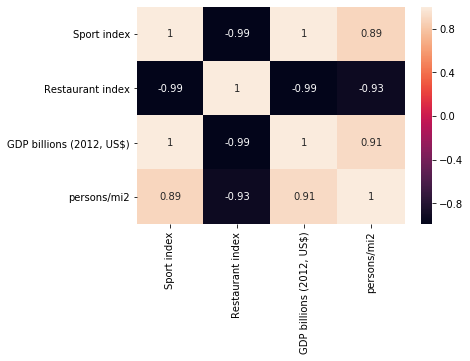

In [168]:
#Correlation
corr_matrix=df_corr.corr(method='pearson')
sn.heatmap(corr_matrix, annot=True)
plt.show()